The criterion for the mapping is to minimize stress
- Start with a (random) configuration of points in small # dimension
- Apply some form of steepest descent iteratively to minimize the stress
  - move objects
  - If moving objects does not help add dimensions

$$ stress = \sqrt{\frac{\sum_{i,j} (d^{'}_{ij} - d_{ij})^{2}}{\sum_{i,j} d_{ij}^{2}}} $$

$$ {stress}^2 = \frac{\sum_{i,j} (d^{'}_{ij} - d_{ij})^{2}}{\sum_{i,j} d_{ij}^{2}} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# calculate gradient at a specific point


def gradient_at_k_l(X, S, S_star, T_star, d, d_prime, k, l):
    g_kl = 0
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            if i == j:
                continue
            if k == i:
                delta_ki = 1
            else:
                delta_ki = 0
            if k == j:
                delta_kj = 1
            else:
                delta_kj = 0
            g_kl += (
                (delta_ki - delta_kj)
                * (((d[i, j] - d_prime[i, j]) / S_star) - (d[i, j] / T_star))
                * ((X[i, l] - X[j, l]) / d[i, j])
            )
    g_kl *= S
    return g_kl

In [3]:
# calculate gradient


def gradient(X, d, d_prime):
    S_star = sum(sum((d - d_prime) ** 2))
    T_star = sum(sum(d**2))
    S = np.sqrt(S_star / T_star)
    gradient_matrix = np.zeros_like(X)
    for k in range(gradient_matrix.shape[0]):
        for l in range(gradient_matrix.shape[1]):
            gradient_matrix[k, l] = gradient_at_k_l(
                X, S, S_star, T_star, d, d_prime, k, l
            )
    return gradient_matrix

In [4]:
# get distances matrix


def calculate_distances(data):
    distances = np.zeros((len(data), len(data)))

    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            distances[i, j] = np.linalg.norm(np.subtract(data[i], data[j]))
            distances[j, i] = np.linalg.norm(np.subtract(data[i], data[j]))

    return distances

In [5]:
# function to calculate stress


def calculate_stress(new_distances, org_distances):
    return np.sqrt(
        (sum(sum((new_distances - org_distances) ** 2)))
        / (sum(sum(org_distances**2)))
    )

In [6]:
def MDS(original_distances, dim = None):
    # start with one dimension
    stress_array = [np.inf]
    
    if dim != None:
        # random config to begin with
        low_dim_data = np.random.random((original_distances.shape[0], dim))

        # use gradient descent algo to find the next configuration
        ## p_n+1 = p_n - (learning_rate) * (gradient of loss @ p_n)

        stress_array.append(
            calculate_stress(
                new_distances=calculate_distances(data=low_dim_data),
                org_distances=original_distances,
            )
        )

        learning_rate = 0.001

        p_n = low_dim_data

        for i in range(1000):
            g = gradient(
                X=p_n, d=original_distances, d_prime=calculate_distances(data=p_n)
            )
            mag_g = np.sqrt(sum(sum(g**2)) / sum(sum(p_n**2)))
            p_n += learning_rate * g / mag_g
            stress_array.append(
                calculate_stress(
                    new_distances=calculate_distances(data=p_n),
                    org_distances=original_distances,
                )
            )

        low_dim_features = p_n
    else: 
        dim = 0
        low_dim_features = None
        while stress_array[-1] > 0.1:
            # increase dimension
            dim += 1
            # random config to begin with
            low_dim_data = np.random.random((original_distances.shape[0], dim))

            # use gradient descent algo to find the next configuration
            ## p_n+1 = p_n - (learning_rate) * (gradient of loss @ p_n)

            stress_array.append(
                calculate_stress(
                    new_distances=calculate_distances(data=low_dim_data),
                    org_distances=original_distances,
                )
            )

            learning_rate = 0.001

            p_n = low_dim_data

            for i in range(1000):
                g = gradient(
                    X=p_n, d=original_distances, d_prime=calculate_distances(data=p_n)
                )
                mag_g = np.sqrt(sum(sum(g**2)) / sum(sum(p_n**2)))
                p_n += learning_rate * g / mag_g
                stress_array.append(
                    calculate_stress(
                        new_distances=calculate_distances(data=p_n),
                        org_distances=original_distances,
                    )
                )

            low_dim_features = p_n
    return (dim, stress_array, low_dim_features)

In [7]:
# fake data

# data = np.array([[0.2, 0.3, 0.4], [0.8, 0.4, 0.9], [0.3, 0.5, 0.6], [0.1, 0.7, 0.2]])
data =  np.random.random((100,900))
data

array([[0.72681638, 0.47346903, 0.4579066 , 0.78627687, 0.6467383 ,
        0.00228695, 0.29910386, 0.98529486, 0.38204221, 0.98260548],
       [0.68642742, 0.90699463, 0.17374325, 0.36195692, 0.83160822,
        0.29098961, 0.7337339 , 0.76571632, 0.17764246, 0.41000419],
       [0.63878007, 0.27549088, 0.2529273 , 0.29456805, 0.03170135,
        0.18442598, 0.48734656, 0.81587091, 0.08640451, 0.70050726],
       [0.68641485, 0.14133845, 0.53840295, 0.38600255, 0.53518663,
        0.37298536, 0.04937989, 0.14427906, 0.7121334 , 0.32175582],
       [0.71355432, 0.89103747, 0.70169552, 0.46772204, 0.57696723,
        0.78512798, 0.41924512, 0.40849987, 0.17551026, 0.23460682]])

In [8]:
original_distances = calculate_distances(data=data)
original_distances

array([[0.        , 1.08382081, 0.98656259, 1.32055117, 1.37929018],
       [1.08382081, 0.        , 1.10409422, 1.40084487, 0.92585134],
       [0.98656259, 1.10409422, 0.        , 1.25579231, 1.29213537],
       [1.32055117, 1.40084487, 1.25579231, 0.        , 1.12690157],
       [1.37929018, 0.92585134, 1.29213537, 1.12690157, 0.        ]])

3 0.045373858239232644


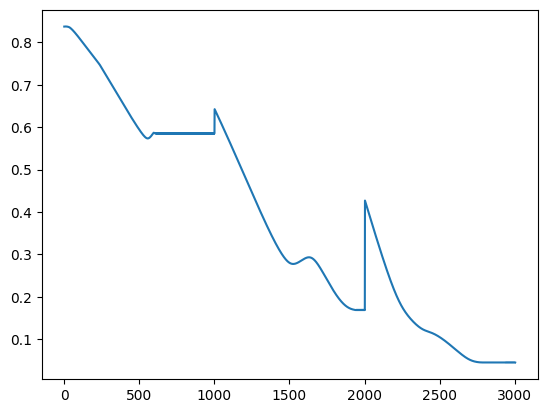

In [9]:
dim, sa, new_representation = MDS(original_distances=original_distances)
print(dim, sa[-1])
plt.plot(sa)

In [10]:
new_representation

array([[ 0.42793505,  0.45133431, -0.3598394 ],
       [-0.05251176,  1.11630055,  0.24840393],
       [ 0.10244211,  0.06247047,  0.49056933],
       [ 1.25732359,  0.51812625,  0.60001599],
       [ 0.52136774,  1.23898746,  0.85387685]])

2 0.1690173239738249


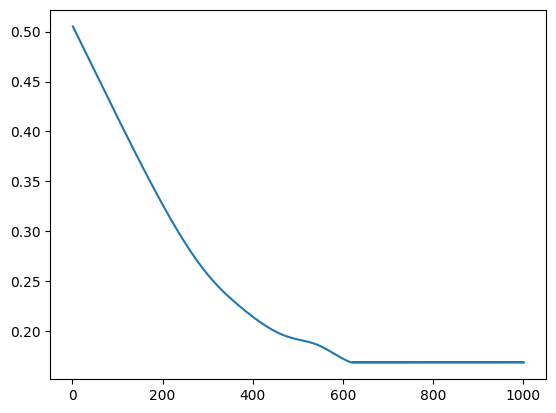

In [11]:
dim, sa, new_representation = MDS(original_distances=original_distances, dim=2)
print(dim, sa[-1])
plt.plot(sa)